In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Load data into dataframe
file_path = Path('Resources/combineddata.csv')
df = pd.read_csv(file_path)
df.head()

,countid,yearvalue,monthvalue,weeknumber,locationname,daterecorded,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,19900101,1990,1,1,Bonneville,1990-01-01,49.0,35.0,0.89,NaN,NaN
1,19900102,1990,1,1,Bonneville,1990-01-02,45.0,36.0,0.85,NaN,NaN
2,19900103,1990,1,1,Bonneville,1990-01-03,46.0,39.0,0.02,NaN,NaN
3,19900104,1990,1,1,Bonneville,1990-01-04,49.0,42.0,0.04,NaN,NaN
4,19900105,1990,1,1,Bonneville,1990-01-05,53.0,45.0,0.47,NaN,NaN


In [3]:
# Pull desired columns
df_stlhead_week_month = df[['weeknumber','monthvalue','maxtempf','mintempf','precipitationinch','watertempf','stlheadcount']]
df_stlhead_week_month.head(3)

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,1,49.0,35.0,0.89,NaN,NaN
1,1,1,45.0,36.0,0.85,NaN,NaN
2,1,1,46.0,39.0,0.02,NaN,NaN


In [4]:
# Drop NaN values
week_month = df_stlhead_week_month.dropna(axis=0)
week_month.head()

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
73,11,3,53.0,38.0,0.12,44.06,27.0
74,11,3,69.0,38.0,0.00,44.96,44.0
75,11,3,61.0,44.0,0.00,44.06,36.0
76,12,3,59.0,44.0,0.02,44.96,60.0
77,12,3,67.0,44.0,0.00,46.04,46.0


In [5]:
week_month

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
73,11,3,53.0,38.0,0.12,44.06,27.0
74,11,3,69.0,38.0,0.00,44.96,44.0
75,11,3,61.0,44.0,0.00,44.06,36.0
76,12,3,59.0,44.0,0.02,44.96,60.0
77,12,3,67.0,44.0,0.00,46.04,46.0
...,...,...,...,...,...,...,...
11583,38,9,76.0,52.0,0.93,66.56,590.0
11584,39,9,60.0,51.0,1.50,66.56,702.0
11585,39,9,64.0,50.0,0.58,66.74,698.0
11586,39,9,75.0,50.0,0.00,66.38,1004.0


In [6]:
day_df

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,1.000000,41.833333,32.185185,0.366481,40.860000,17.185185
1,2,1.000000,42.043956,32.934066,0.410659,40.365055,17.395604
2,3,1.000000,41.988764,33.550562,0.320674,39.600449,16.258427
3,4,1.000000,44.470588,35.082353,0.316706,38.816706,14.552941
4,5,1.204819,47.132530,37.060241,0.461205,39.098072,16.879518


In [7]:
week_df = week_df.astype({'stlheadcount': 'int64'})

In [8]:
week_df.dtypes

weeknumber             int64
monthvalue           float64
maxtempf             float64
mintempf             float64
precipitationinch    float64
watertempf           float64
stlheadcount           int64
dtype: object

In [9]:
# Make a df grouped by average count on monthvalue
month_df = week_month.groupby(['monthvalue']).mean().reset_index()
month_df.head()

,monthvalue,weeknumber,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,3.077121,43.449871,34.185090,0.370746,39.715013,16.408740
1,2,7.418079,48.228814,35.528249,0.290763,39.438475,18.274011
2,3,11.964080,55.110632,38.623563,0.292500,43.468534,43.793103
3,4,15.950386,60.340684,42.410143,0.216417,49.075590,47.721058
4,5,20.314952,67.453871,47.808059,0.135673,55.619130,62.323436


Visualizations

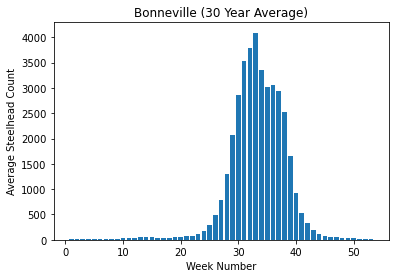

In [10]:
# Bar plot of weekly average of fish count over 30 years
plt.bar(week_df.weeknumber, week_df.stlheadcount)
plt.title('Bonneville (30 Year Average)')
plt.xlabel('Week Number')
plt.ylabel('Average Steelhead Count')
plt.show()

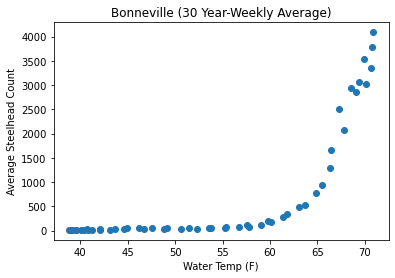

In [11]:
# Plot of fish count by water temperature
plt.scatter(week_df.watertempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Water Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

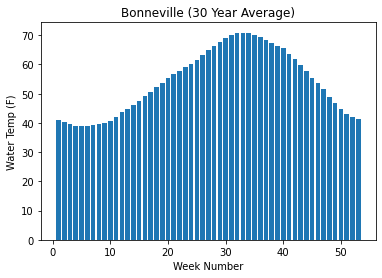

In [12]:
# Bar plot of weekly average of fish count over 30 years
plt.bar(week_df.weeknumber, week_df.watertempf)
plt.title('Bonneville (30 Year Average)')
plt.xlabel('Week Number')
plt.ylabel('Water Temp (F)')
plt.show()

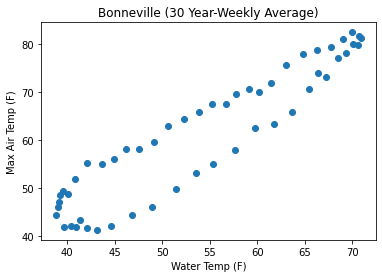

In [13]:
# Plot of Max air temperature by Water temp
plt.scatter(week_df.watertempf, week_df.maxtempf)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Water Temp (F)')
plt.ylabel('Max Air Temp (F)')
plt.show()

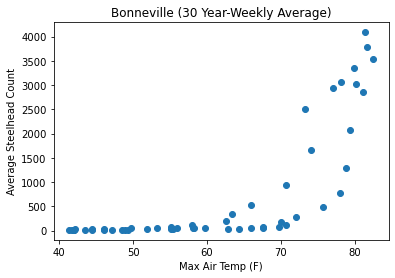

In [14]:
# Plot of fish count by max air temp
plt.scatter(week_df.maxtempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Max Air Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

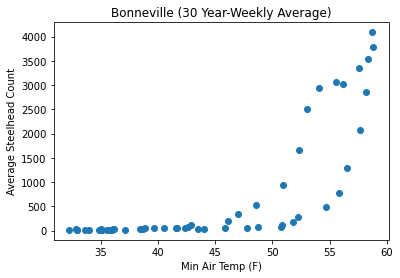

In [15]:
# Plot of fish count by min air temp
plt.scatter(week_df.mintempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Min Air Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

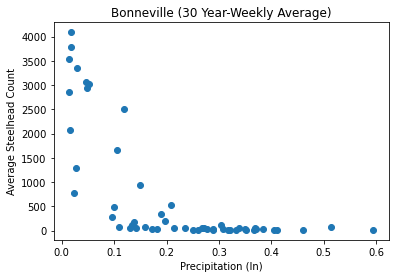

In [16]:
# Plot of fish count by rain
plt.scatter(week_df.precipitationinch, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Precipitation (In)')
plt.ylabel('Average Steelhead Count')
plt.show()

# Machine learning

In [17]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [19]:
# labelencoder = LabelEncoder()
# week_df['stlheadcount'] = labelencoder.fit_transform(week_df['stlheadcount'])

In [20]:
target = ['stlheadcount']

In [60]:
# Creating features
X = week_df.drop('stlheadcount', axis=1)
# X = pd.get_dummies(X)

# Creating target
y = week_df['stlheadcount']
y

0       17
1       17
2       16
3       14
4       16
5       14
6       18
7       19
8       22
9       32
10      43
11      43
12      48
13      55
14      53
15      45
16      41
17      39
18      50
19      58
20      67
21      81
22     117
23     169
24     285
25     485
26     777
27    1294
28    2077
29    2858
30    3534
31    3780
32    4089
33    3346
34    3017
35    3058
36    2937
37    2514
38    1660
39     932
40     523
41     340
42     193
43     122
44      72
45      59
46      48
47      36
48      31
49      27
50      19
51      19
52      18
Name: stlheadcount, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
X_train.dtypes

weeknumber             int64
monthvalue           float64
maxtempf             float64
mintempf             float64
precipitationinch    float64
watertempf           float64
dtype: object

In [80]:
X_test

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf
30,31,7.278302,82.518868,58.367925,0.013774,69.926509
2,3,1.000000,41.988764,33.550562,0.320674,39.600449
51,52,12.000000,41.661538,33.923077,0.404462,42.107692
32,33,8.000000,81.348624,58.697248,0.018165,70.876697
31,32,7.972350,81.635945,58.824885,0.018664,70.738157
46,47,11.000000,49.770115,38.816092,0.369195,51.462759
34,35,8.045662,80.123288,56.132420,0.051233,70.120548
39,40,9.522013,70.767296,50.886792,0.149937,65.491321
45,46,11.000000,53.266667,41.613333,0.338200,53.543600
19,20,5.000000,67.626168,47.747664,0.130187,55.279720


In [44]:
y_test

30    3534
2       16
51      19
32    4089
31    3780
46      48
34    3017
39     932
45      59
19      58
10      43
3       14
21      81
49      27
Name: stlheadcount, dtype: int64

In [45]:
y_train.dtypes

dtype('int64')

In [46]:
y_train.describe()

count      39.000000
mean      603.256410
std      1021.477303
min        14.000000
25%        31.500000
50%        55.000000
75%       504.000000
max      3346.000000
Name: stlheadcount, dtype: float64

In [26]:
# X_scaled = StandardScaler().fit_transform(X_train)
# print(X_scaled[0:5])

In [27]:
# X_scaled.dtype

In [28]:
# y_scaled = StandardScaler().fit_transform(y_train)
# print(y_scaled[0:5])

In [29]:
# y_scaled.dtype

## Naive Random Oversampling

In [47]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({1660: 2,
         340: 2,
         285: 2,
         193: 2,
         523: 2,
         3058: 2,
         777: 2,
         55: 2,
         117: 2,
         72: 2,
         1294: 2,
         39: 2,
         31: 2,
         3346: 2,
         169: 2,
         16: 2,
         2937: 2,
         53: 2,
         2858: 2,
         2077: 2,
         36: 2,
         18: 2,
         50: 2,
         67: 2,
         485: 2,
         19: 2,
         17: 2,
         41: 2,
         45: 2,
         14: 2,
         43: 2,
         32: 2,
         22: 2,
         48: 2,
         122: 2,
         2514: 2})

In [68]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)
y_pred

array([1822.53666276,  -91.66693197, -408.8503387 , 1826.50532785,
       1746.07140775,  337.96321792, 1878.06673292, 1404.99209582,
        408.78629589,  714.06377788, -319.00261833, -164.63632907,
       1021.25616077, -211.25154715])

In [70]:
list(model.predict(X_test[:10]))

[1822.5366627552576,
 -91.66693197470522,
 -408.85033870051575,
 1826.5053278479536,
 1746.0714077527182,
 337.96321791602804,
 1878.0667329212156,
 1404.992095822612,
 408.78629589297543,
 714.063777879237]

In [71]:
y_test[:10]

30    3534
2       16
51      19
32    4089
31    3780
46      48
34    3017
39     932
45      59
19      58
Name: stlheadcount, dtype: int64

In [72]:
model.score(X_train, y_train)

0.5759859507790269

In [73]:
model.score(X_test, y_test)

0.5636224099939219

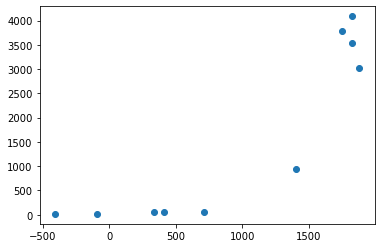

In [79]:
# Plot of fish count by rain
plt.scatter(model.predict(X_test)[:10], y_test[:10])

plt.show()

In [67]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
nro = balanced_accuracy_score(y_test, y_pred)
nro

C:\Users\mthal\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.07142857142857142

In [36]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

         14       0.00      0.00      1.00      0.00      0.00      0.00       1.0
         16       0.00      0.00      0.92      0.00      0.00      0.00       1.0
         17       0.00      0.00      0.93      0.00      0.00      0.00       0.0
         18       0.00      0.00      0.93      0.00      0.00      0.00       0.0
         19       0.00      0.00      1.00      0.00      0.00      0.00       1.0
         27       0.00      0.00      1.00      0.00      0.00      0.00       1.0
         31       0.00      0.00      0.93      0.00      0.00      0.00       0.0
         32       0.00      0.00      0.93      0.00      0.00      0.00       0.0
         36       0.00      0.00      0.93      0.00      0.00      0.00       0.0
         43       0.00      0.00      1.00      0.00      0.00      0.00       1.0
         48       0.00      0.00      1.00      0.00      0.00      0.00       1.0
   

C:\Users\mthal\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mthal\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mthal\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SMOTE Oversampling

In [37]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train, y_train
)
Counter(y_resampled)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

In [ ]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Calculated the balanced accuracy score
smote_bac = balanced_accuracy_score(y_test, y_pred)
smote_bac

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

## Undersampling

In [ ]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X, y)
Counter(y_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
under_bac = balanced_accuracy_score(y_test, y_pred)
under_bac

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

## SMOTEENN

In [ ]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
smoteen_bac = balanced_accuracy_score(y_test, y_pred)

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

In [ ]:
### Balanced Random Forest Classifier

In [ ]:
# Create a random forest classifier.
from imblearn.ensemble import BalancedRandomForestClassifier
brfc_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
brfc_model = brfc_model.fit(X_train, y_train)
brfc_model

In [ ]:
# Calculated the balanced accuracy score
predictions = brfc_model.predict(X_test)
brfc_bac = balanced_accuracy_score(y_test, predictions)
brfc_bac

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

In [ ]:
## Easy Ensemble AdaBoost Classifier

In [ ]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

eec_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)

eec_model = eec_model.fit(X_train, y_train)

In [ ]:
# Calculated the balanced accuracy score
predictions = eec_model.predict(X_test)
ee_bac = balanced_accuracy_score(y_test, predictions)
ee_bac

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

In [ ]:
# X = week_df.watertempf.values.reshape(-1, 1)

In [ ]:
# X.shape

In [ ]:
# y = week_df.stlheadcount

In [ ]:
# model = LinearRegression()

In [ ]:
# model.fit(X,y)

In [ ]:
# y_pred = model.predict(X)
# print(y_pred.shape)

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
# SVM (support vector machines)

In [ ]:
X.describe()

In [ ]:
y.describe()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# print("Training:", Counter(y_train['stlheadcount']))
# print("Test:", Counter(y_test['stlheadcount']))

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
X_train.dtypes

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(week_df[stlheadcount]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(stlheadcount)
encode_df.head()

In [ ]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# print(Counter(y_resampled['stlheadcount']))

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
y.describe()

In [ ]:
plt.scatter(df.Week_Number, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:

print(accuracy_score(y_test, y_pred))